In [1]:
#%%
import pandas as pd

# Read SMS dataset
sms = pd.read_csv("spam.csv", encoding='latin-1')

# Drop NaN values
sms.dropna(how="any", inplace=True, axis=1)

# Rename columns
sms.columns = ['label', 'message']

# Convert label to numerical variable
sms['label_num'] = sms.label.map({'ham':0, 'spam':1})

# Calculate message length
sms['message_len'] = sms.message.apply(len)

sms.head()


,label,message,label_num,message_len
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


In [2]:
# Import necessary libraries
import string
from nltk.corpus import stopwords

# Define function for text processing
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Define stopwords to be removed
    STOPWORDS = stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure']
    
    # Remove punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join characters to form a string
    nopunc = ''.join(nopunc)
    
    # Remove stopwords and return cleaned text
    return ' '.join([word for word in nopunc.split() if word.lower() not in STOPWORDS])

# Apply text processing function to 'message' column and create 'clean_msg' column
sms['clean_msg'] = sms['message'].apply(text_process)

# Display the DataFrame with the new 'clean_msg' column
sms.head()


,label,message,label_num,message_len,clean_msg
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,Go jurong point crazy Available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,0,29,Ok lar Joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,Free entry wkly comp win FA Cup final tkts 21s...
3,ham,U dun say so early hor... U c already then say...,0,49,dun say early hor c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,Nah think goes usf lives around though


In [3]:
#%%
import string
from nltk.corpus import stopwords
from collections import Counter

def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Define stopwords to be removed
    STOPWORDS = stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure']
    
    # Remove punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join characters to form a string
    nopunc = ''.join(nopunc)
    
    # Remove stopwords and return cleaned text
    return ' '.join([word for word in nopunc.split() if word.lower() not in STOPWORDS])

# Tokenize ham messages and count word occurrences
words = sms[sms.label=='ham'].clean_msg.apply(lambda x: [word.lower() for word in x.split()])
ham_words = Counter()

# Update counter with ham message tokens
for msg in words:
    ham_words.update(msg)

# Print most common words in ham messages
print(ham_words.most_common(50))

# Tokenize spam messages and count word occurrences
words = sms[sms.label=='spam'].clean_msg.apply(lambda x: [word.lower() for word in x.split()])
spam_words = Counter()

# Update counter with spam message tokens
for msg in words:
    spam_words.update(msg)

# Print most common words in spam messages
print(spam_words.most_common(50))


[('get', 303), ('ltgt', 276), ('ok', 272), ('go', 247), ('ill', 236), ('know', 232), ('got', 231), ('like', 229), ('call', 229), ('come', 224), ('good', 222), ('time', 189), ('day', 187), ('love', 185), ('going', 167), ('want', 163), ('one', 162), ('home', 160), ('lor', 160), ('need', 156), ('sorry', 153), ('still', 146), ('see', 137), ('n', 134), ('later', 134), ('da', 131), ('r', 131), ('back', 129), ('think', 128), ('well', 126), ('today', 125), ('send', 123), ('tell', 121), ('cant', 118), ('ì', 117), ('hi', 117), ('take', 112), ('much', 112), ('oh', 111), ('night', 107), ('hey', 106), ('happy', 105), ('great', 100), ('way', 100), ('hope', 99), ('pls', 98), ('work', 96), ('wat', 95), ('thats', 94), ('dear', 94)]
[('call', 347), ('free', 216), ('txt', 150), ('mobile', 123), ('text', 120), ('claim', 113), ('stop', 113), ('reply', 101), ('prize', 92), ('get', 83), ('new', 69), ('send', 67), ('nokia', 65), ('urgent', 63), ('cash', 62), ('win', 60), ('contact', 56), ('service', 55), ('pl

In [4]:
#%%
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Split data into training and testing sets
X = sms.clean_msg
y = sms.label_num
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Create a pipeline for Naive Bayes classifier
nb_pipe = Pipeline([
    ('bow', CountVectorizer()), 
    ('tfid', TfidfTransformer()),  
    ('model', MultinomialNB())
])

# Fit the pipeline
nb_pipe.fit(X_train, y_train)

# Predict and evaluate
y_pred = nb_pipe.predict(X_test)
accuracy_nb = metrics.accuracy_score(y_test, y_pred)

# Create a pipeline for Logistic Regression classifier
logreg_pipe = Pipeline([
    ('bow', CountVectorizer()), 
    ('tfid', TfidfTransformer()),  
    ('model', LogisticRegression(solver='liblinear'))
])

# Fit the pipeline
logreg_pipe.fit(X_train, y_train)

# Predict and evaluate
y_pred = logreg_pipe.predict(X_test)
accuracy_logreg = metrics.accuracy_score(y_test, y_pred)

# Return accuracies
accuracy_nb, accuracy_logreg


(0.9669777458722182, 0.9633883704235463)

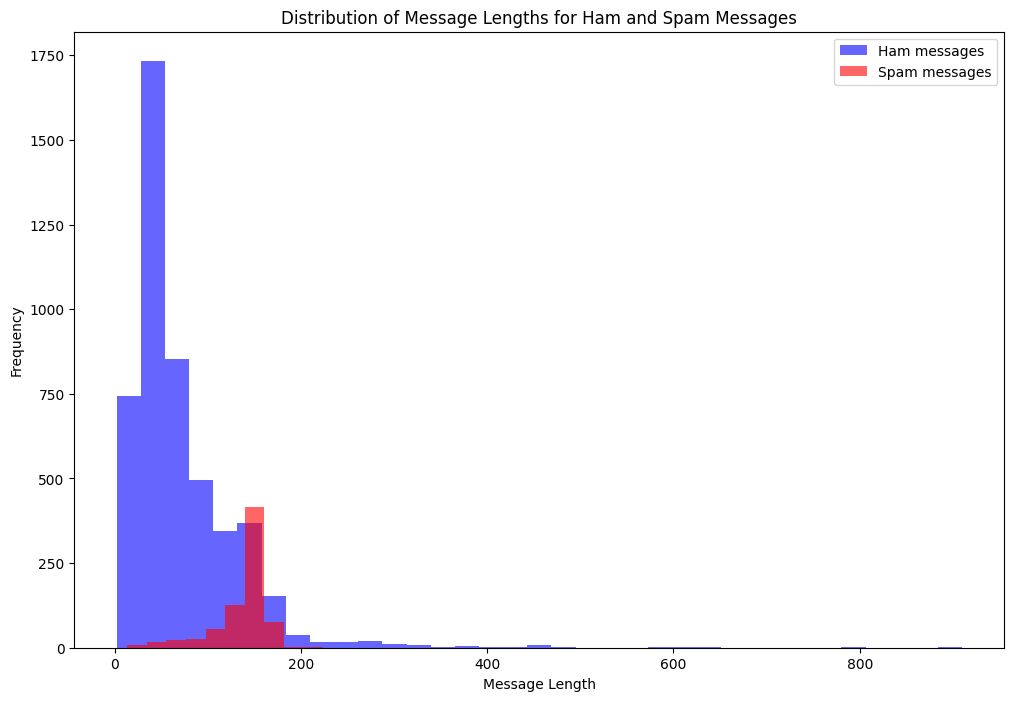

In [5]:
import matplotlib.pyplot as plt

# Set up figure and axes
plt.figure(figsize=(12, 8))

# Plot histogram for ham messages
sms[sms.label=='ham'].message_len.plot(bins=35, kind='hist', color='blue', label='Ham messages', alpha=0.6)

# Plot histogram for spam messages
sms[sms.label=='spam'].message_len.plot(kind='hist', color='red', label='Spam messages', alpha=0.6)

# Add labels and legend
plt.legend()
plt.xlabel("Message Length")
plt.title("Distribution of Message Lengths for Ham and Spam Messages")

# Show plot
plt.show()
